In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\lenovo\Desktop\Notebooks\DATA\gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<Axes: xlabel='Gene One', ylabel='Gene Two'>

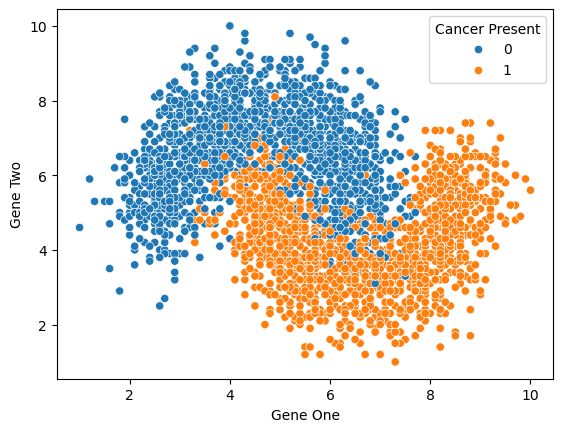

In [4]:
sns.scatterplot(data=df,x='Gene One',y='Gene Two',hue='Cancer Present')

<Axes: xlabel='Gene One', ylabel='Gene Two'>

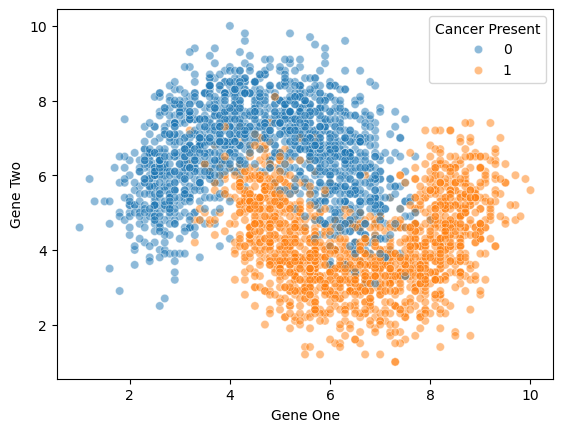

In [5]:
sns.scatterplot(data=df,x='Gene One',y='Gene Two',hue='Cancer Present',alpha=0.5)

<Axes: xlabel='Gene One', ylabel='Gene Two'>

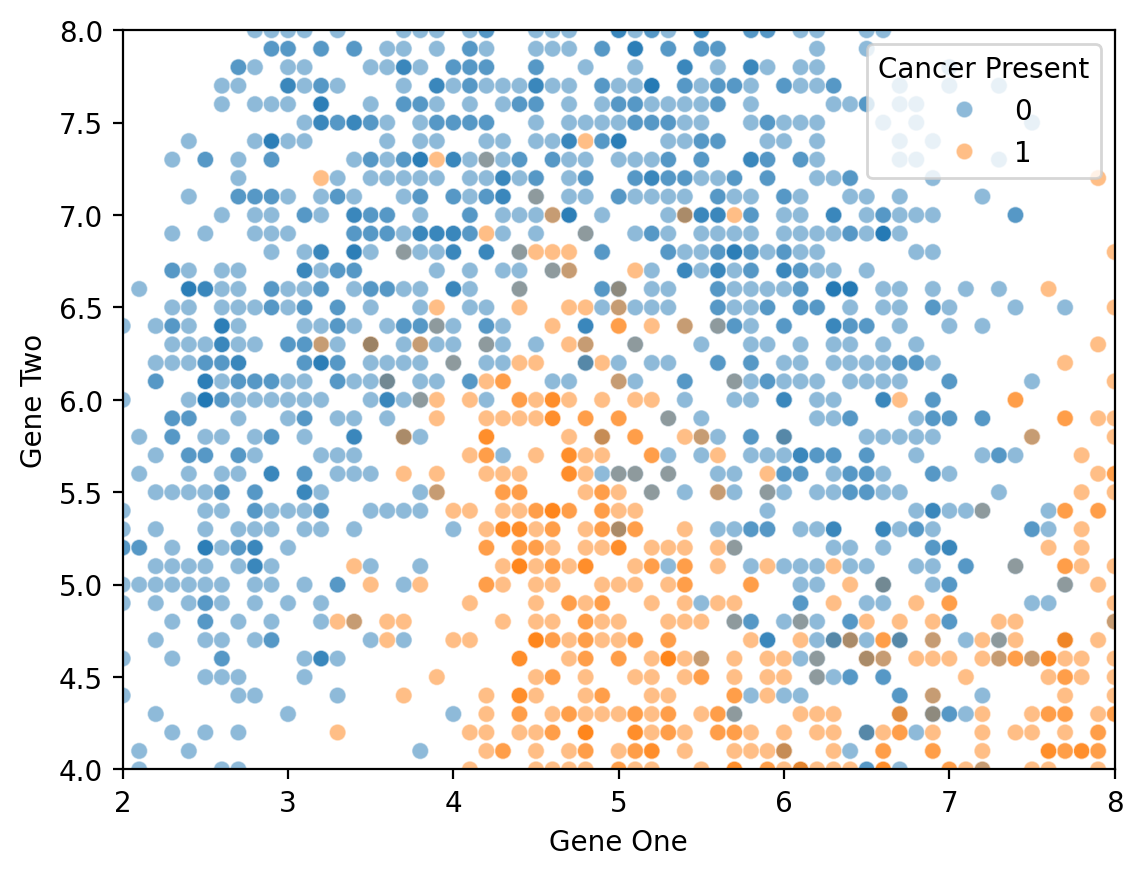

In [6]:
plt.figure(dpi=200)
plt.xlim(2,8)
plt.ylim(4,8)
sns.scatterplot(data=df,x='Gene One',y='Gene Two',hue='Cancer Present',alpha=0.5)

<Axes: xlabel='Gene One', ylabel='Gene Two'>

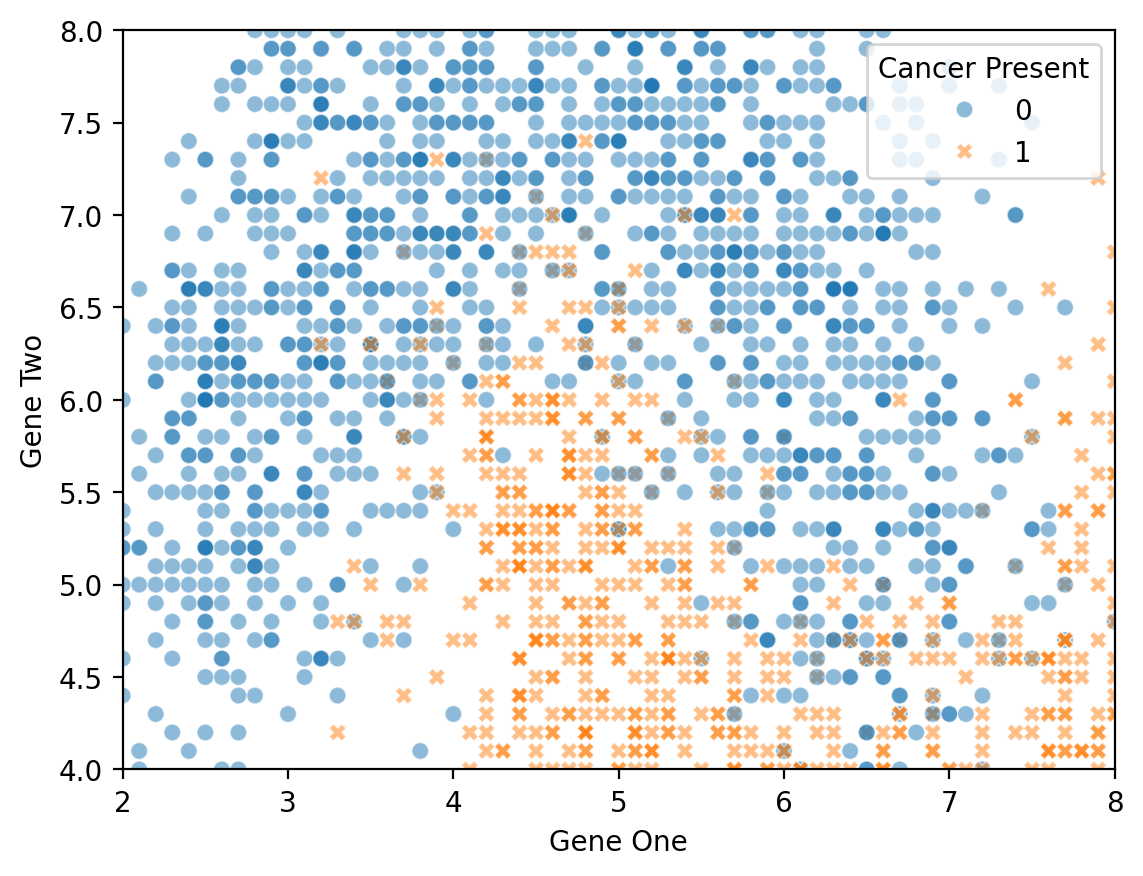

In [7]:
plt.figure(dpi=200)
plt.xlim(2,8)
plt.ylim(4,8)
sns.scatterplot(data=df,x='Gene One',y='Gene Two',hue='Cancer Present',alpha=0.5,style='Cancer Present')

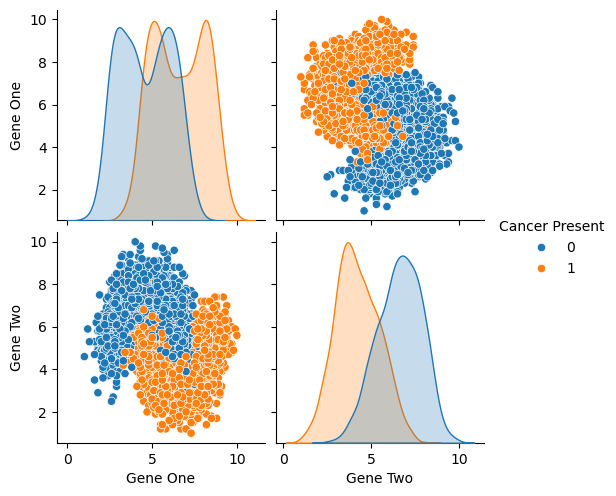

In [8]:
sns.pairplot(data=df,hue='Cancer Present')

In [13]:
X = df.drop('Cancer Present',axis=1)
y= df['Cancer Present']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn_model =  KNeighborsClassifier(n_neighbors=1)

In [21]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
y_pred = knn_model.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix,classification_report

In [24]:
confusion_matrix(y_test,y_pred)

array([[426,  44],
       [ 45, 385]], dtype=int64)

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



In [26]:
from sklearn.metrics import accuracy_score

In [28]:
1-accuracy_score(y_test,y_pred)

0.09888888888888892

In [29]:
test_error_rates = []
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train)
    y_pred  = knn_model.predict(X_test)
    test_error = 1-accuracy_score(y_test,y_pred)
    test_error_rates.append(test_error)

In [30]:
test_error_rates

[0.09888888888888892,
 0.09777777777777774,
 0.07333333333333336,
 0.0755555555555556,
 0.07222222222222219,
 0.06444444444444442,
 0.06444444444444442,
 0.061111111111111116,
 0.05777777777777782,
 0.06222222222222218,
 0.061111111111111116,
 0.06000000000000005,
 0.061111111111111116,
 0.06222222222222218,
 0.05888888888888888,
 0.05777777777777782,
 0.05666666666666664,
 0.05555555555555558,
 0.05222222222222217,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05555555555555558,
 0.05555555555555558,
 0.05777777777777782,
 0.05666666666666664]

Text(0.5, 0, 'KNeighbors')

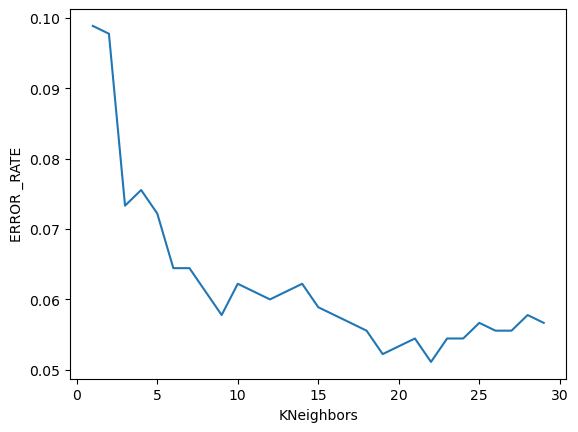

In [31]:
plt.plot(range(1,30),test_error_rates)
plt.ylabel('ERROR _RATE')
plt.xlabel('KNeighbors')

In [32]:
# PIPELINE --> GRIDSEARCH CV

In [33]:
scaler = StandardScaler()

In [34]:
knn = KNeighborsClassifier()

In [35]:
operations = [('scaler',scaler),('knn',knn)]

In [36]:
from sklearn.pipeline import Pipeline

In [37]:
pipe = Pipeline(operations)

In [39]:
key_values = list(range(1,20))

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = {'knn__n_neighbors':key_values}

In [42]:
final_cv_classifier = GridSearchCV(pipe,param_grid,scoring='accuracy')

In [43]:
final_cv_classifier.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [45]:
y_pred = final_cv_classifier.predict(X_test)

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [56]:
new_patient = [[3,6.4]]

In [57]:
final_cv_classifier.predict(new_patient)

array([0], dtype=int64)

In [58]:
final_cv_classifier.predict_proba(new_patient)

array([[0.875, 0.125]])